# Human Silhouettes Detector
---
Detector of human sulhouettes.

In [1]:
import os
import csv
import numpy as np
import pandas as pd

import pickle

from PIL import Image

from src.human_silhouette_detector import (detect_human_silhouettes,
                                           detect_human_silhouettes_and_faces)
from src.face_detector import inference

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'MainModel.KitModel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original sou

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [3]:
def show_images(images, titles, suptitle='Images'):
    assert (len(images) == len(titles)), 'Lists of images and titles of images must have the same length!'
    
    fig, ax = plt.subplots(1, len(images), figsize=(15, 5))
    
    for i, (image, title) in enumerate(zip(images, titles)):
        ax[i].imshow(image)
        ax[i].set_title(title)
        ax[i].axis('off')
    
    fig.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

In [4]:
img1 = Image.open('images/unmasked_people1.jpg')
img1_info, img1 = detect_human_silhouettes(img1)

img2 = Image.open('images/unmasked_people2.jpg')
img2_info, img2 = detect_human_silhouettes(img2)

img3 = Image.open('images/unmasked_people3.jpg')
img3_info, img3 = detect_human_silhouettes(img3)

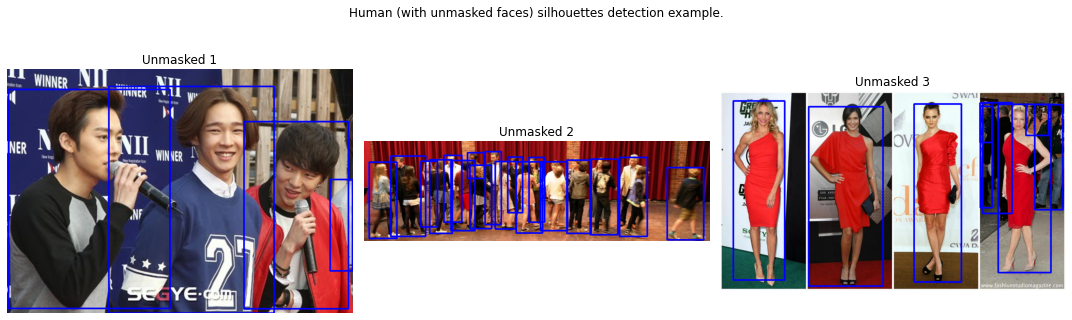

In [5]:
show_images([img1, img2, img3],
            ['Unmasked 1', 'Unmasked 2', 'Unmasked 3'],
            suptitle='Human (with unmasked faces) silhouettes detection example.')

In [6]:
img1 = Image.open('images/masked_people1.jpg')
img1_info, img1 = detect_human_silhouettes(img1)

img2 = Image.open('images/masked_people2.jpg')
img2_info, img2 = detect_human_silhouettes(img2)

img3 = Image.open('images/masked_people3.jpg')
img3_info, img3 = detect_human_silhouettes(img3)

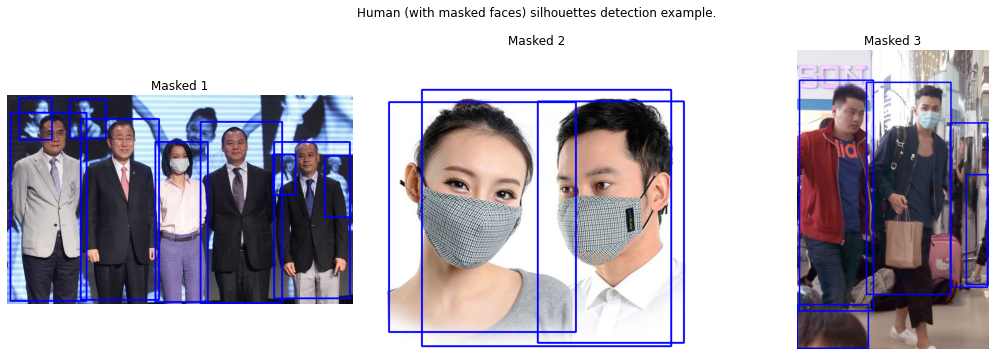

In [7]:
show_images([img1, img2, img3],
            ['Masked 1', 'Masked 2', 'Masked 3'],
            suptitle='Human (with masked faces) silhouettes detection example.')

In [8]:
img1 = Image.open('images/masked_criminal1.png')
img1_info, img1 = detect_human_silhouettes(img1)

img2 = Image.open('images/masked_criminal2.png')
img2_info, img2 = detect_human_silhouettes(img2)

img3 = Image.open('images/masked_criminal3.png')
img3_info, img3 = detect_human_silhouettes(img3)

In [9]:
np.concatenate([img3_info, [[0, 0, 0, 0]]])

array([[  58.84052658,  106.61025238,  857.23040771,  842.90765381],
       [ 300.94412231,  129.93528748, 1264.26257324,  844.55645752],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

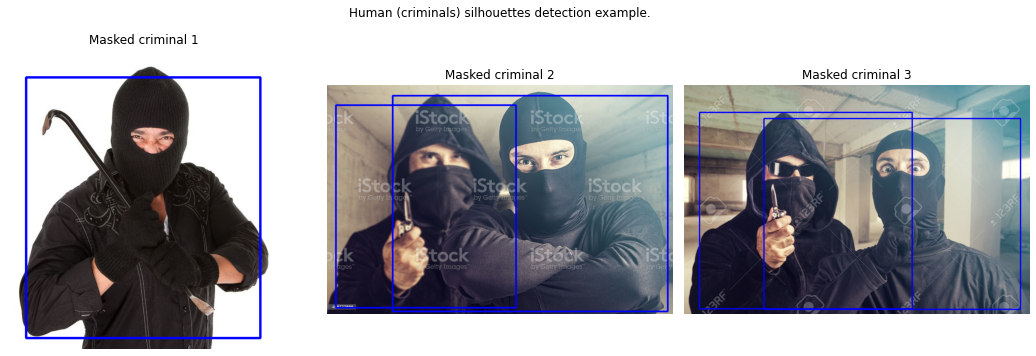

In [10]:
show_images([img1, img2, img3],
            ['Masked criminal 1', 'Masked criminal 2', 'Masked criminal 3'],
            suptitle='Human (criminals) silhouettes detection example.')

## Silhouette and face dependencies
---
Searching for dependencies between silhouette and face positions.
1. Save .csv header row \['img_name', 'silh_x1', 'silh_y1', 'silh_x2', 'silh_y2', 'faceimg_name', 'face_x1', 'face_y1', 'face_x2', 'face_y2'\].
2. For each image.png:
    1. Detect silhouettes.
    2. For each detected silhouette region:
        1. Detect faces.
        2. For each detected face region:
            1. Save detected face as face_x.png.
            2. Save .csv row \['image.png', 'sx1', 'sy1', 'sx2', 'sy2', 'face_x.png', 'fx1', 'fy1', 'fx2', 'fy2'\].

Annotate detected faces whether:
 - **-1** - it's not a face
 - **0** - it's a face without mask or uncorrectly put on mask
 - **1** - it's a face with correctly put on mask

Train DecisionTree model to predict (having two points of silhouette and two of potential face) whether the detection is face or not.

The best split is for test indices \[0:199\].

### Examples

In [11]:
img1 = Image.open('images/unmasked_people1.jpg')
img1_pos, img1_neg, img1 = detect_human_silhouettes_and_faces(img1, highlight_neg=True)

img2 = Image.open('images/unmasked_people2.jpg')
img2_pos, img2_neg, img2 = detect_human_silhouettes_and_faces(img2, highlight_neg=True)

img3 = Image.open('images/unmasked_people3.jpg')
img3_pos, img3_neg, img3 = detect_human_silhouettes_and_faces(img3, highlight_neg=True)

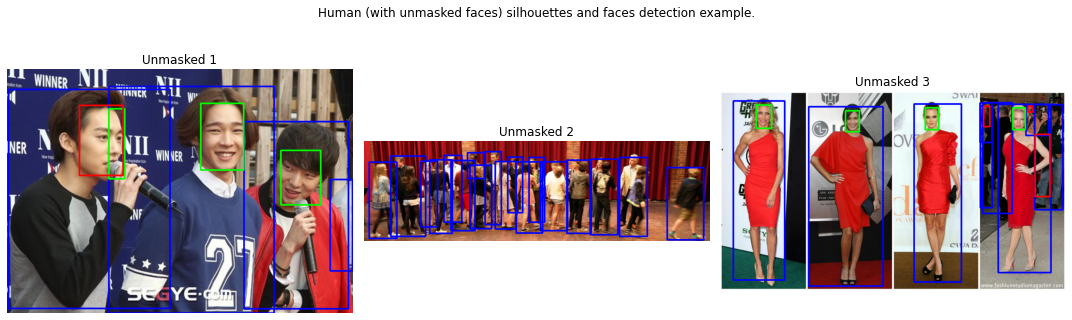

In [12]:
show_images([img1, img2, img3],
            ['Unmasked 1', 'Unmasked 2', 'Unmasked 3'],
            suptitle='Human (with unmasked faces) silhouettes and faces detection example.')

In [13]:
img1 = Image.open('images/masked_people1.jpg')
img1_pos, img1_neg, img1 = detect_human_silhouettes_and_faces(img1, highlight_neg=True)

img2 = Image.open('images/masked_people2.jpg')
img2_pos, img2_neg, img2 = detect_human_silhouettes_and_faces(img2, highlight_neg=True)

img3 = Image.open('images/masked_people3.jpg')
img3_pos, img3_neg, img3 = detect_human_silhouettes_and_faces(img3, highlight_neg=True)

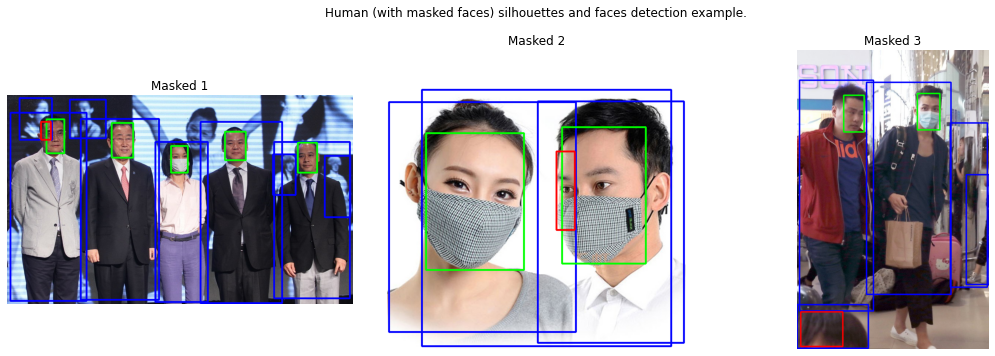

In [14]:
show_images([img1, img2, img3],
            ['Masked 1', 'Masked 2', 'Masked 3'],
            suptitle='Human (with masked faces) silhouettes and faces detection example.')

In [15]:
img1 = Image.open('images/masked_criminal1.png')
img1_pos, img1_neg, img1 = detect_human_silhouettes_and_faces(img1, highlight_neg=True)

img2 = Image.open('images/masked_criminal2.png')
img2_pos, img2_neg, img2 = detect_human_silhouettes_and_faces(img2, highlight_neg=True)

img3 = Image.open('images/masked_criminal3.png')
img3_pos, img3_neg, img3 = detect_human_silhouettes_and_faces(img3, highlight_neg=True)

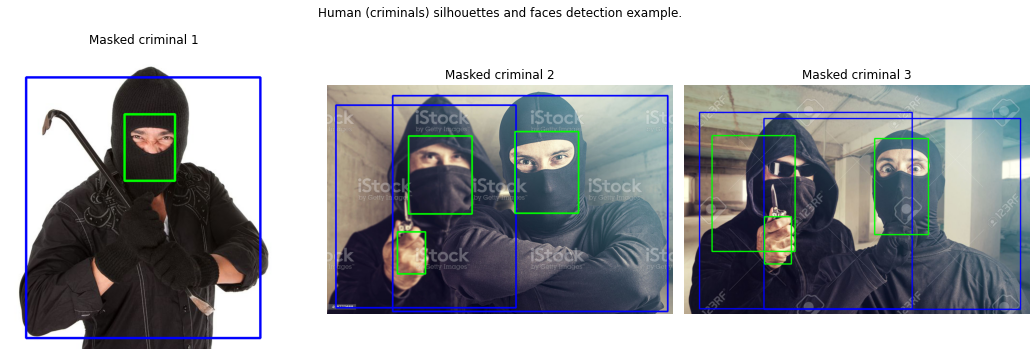

In [16]:
show_images([img1, img2, img3],
            ['Masked criminal 1', 'Masked criminal 2', 'Masked criminal 3'],
            suptitle='Human (criminals) silhouettes and faces detection example.')